# 4.1.1.2 Multiple Linear Regression

## Explanation of Multiple Linear Regression and its Benefits

**Multiple Linear Regression** (MLR) is an extension of Simple Linear Regression that models the relationship between two or more independent variables (predictors) and a single dependent variable (response). The general form of the Multiple Linear Regression model is:

$$[ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p + \epsilon ]$$

Where:
- \( Y \): Dependent variable
- $( X_1, X_2, \ldots, X_p )$: Independent variables (predictors)
- $( \beta_0 )$: Intercept
- $( \beta_1, \beta_2, \ldots, \beta_p )$: Coefficients for each predictor
- $( \epsilon )$: Error term

### **Benefits of Multiple Linear Regression:**
- **Captures Complex Relationships**: MLR can model the impact of multiple factors on the dependent variable simultaneously, providing a more comprehensive understanding of the relationships.
- **Improved Accuracy**: By incorporating multiple predictors, the model can better explain the variability in the dependent variable, often resulting in higher predictive accuracy compared to Simple Linear Regression.
- **Control for Confounding Variables**: MLR allows researchers to control for the effects of other variables, isolating the impact of each predictor.
- **Hypothesis Testing**: MLR can be used to test hypotheses about the relationships between variables and identify the significance of each predictor.


## Methods for Implementing Multiple Linear Regression

Multiple Linear Regression can be implemented using various methods, including manual computation, statistical software, and programming libraries such as `sklearn` in Python. Below, we'll focus on implementing MLR both from scratch and using `sklearn`.


In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Generating some random data for demonstration
np.random.seed(0)
X1 = 2 * np.random.rand(100, 1)
X2 = 3 * np.random.rand(100, 1)
Y = 4 + 3 * X1 + 5 * X2 + np.random.randn(100, 1)

# Combining X1 and X2 into a single matrix X
X = np.hstack([X1, X2])

In [3]:
print(X[:5,:])

[[1.09762701 2.03344961]
 [1.43037873 0.81002392]
 [1.20552675 2.20558207]
 [1.08976637 2.88656564]
 [0.8473096  0.74625943]]


<hr>

## Implementation from Scratch

In [4]:
# Implementing Multiple Linear Regression with OLS from scratch
class MultipleLinearRegressionOLS:
    def fit(self, X, Y):
        ones = np.ones((X.shape[0], 1))
        X = np.concatenate([ones, X], axis=1)
        # Equation 4 from matrix derivation from notebook 4.1.1
        self.beta = np.linalg.inv(X.T @ X) @ X.T @ Y
    
    def predict(self, X):
        ones = np.ones((X.shape[0], 1))
        X = np.concatenate([ones, X], axis=1)
        return X @ self.beta

# Training the model from scratch
model_scratch = MultipleLinearRegressionOLS()
model_scratch.fit(X, Y)

# Predicting from scratch
Y_pred_scratch = model_scratch.predict(X)

# Evaluating the model from scratch
mse_scratch = mean_squared_error(Y, Y_pred_scratch)
r2_scratch = r2_score(Y, Y_pred_scratch)

print(f"Mean Squared Error (scratch): {mse_scratch}")
print(f"R-squared (scratch): {r2_scratch}")


Mean Squared Error (scratch): 0.8316163710670044
R-squared (scratch): 0.956437364907812


<hr>

## Implementation using sklearn

In [5]:
# Creating a Linear Regression model using sklearn
model_sklearn = LinearRegression()

# Fitting the model using sklearn
model_sklearn.fit(X, Y)

# Predicting using sklearn
Y_pred_sklearn = model_sklearn.predict(X)

# Evaluating the model using sklearn
mse_sklearn = mean_squared_error(Y, Y_pred_sklearn)
r2_sklearn = r2_score(Y, Y_pred_sklearn)

print(f"Mean Squared Error (sklearn): {mse_sklearn}")
print(f"R-squared (sklearn): {r2_sklearn}")


Mean Squared Error (sklearn): 0.8316163710670041
R-squared (sklearn): 0.956437364907812


<hr>

## Visualizing the results

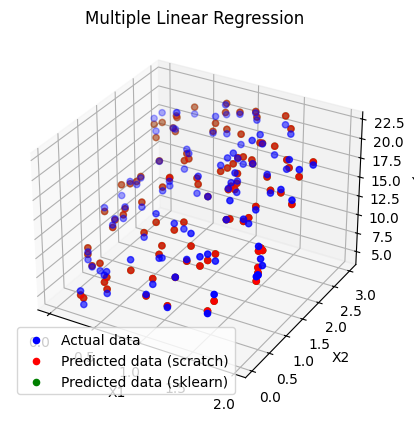

In [6]:
# Plotting the results (Note: 3D plots are more suitable for MLR with two predictors)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, Y, color='blue', label='Actual data')
ax.scatter(X1, X2, Y_pred_scratch, color='red', label='Predicted data (scratch)')
ax.scatter(X1, X2, Y_pred_sklearn, color='green', label='Predicted data (sklearn)')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.title('Multiple Linear Regression')
plt.legend()
plt.show()


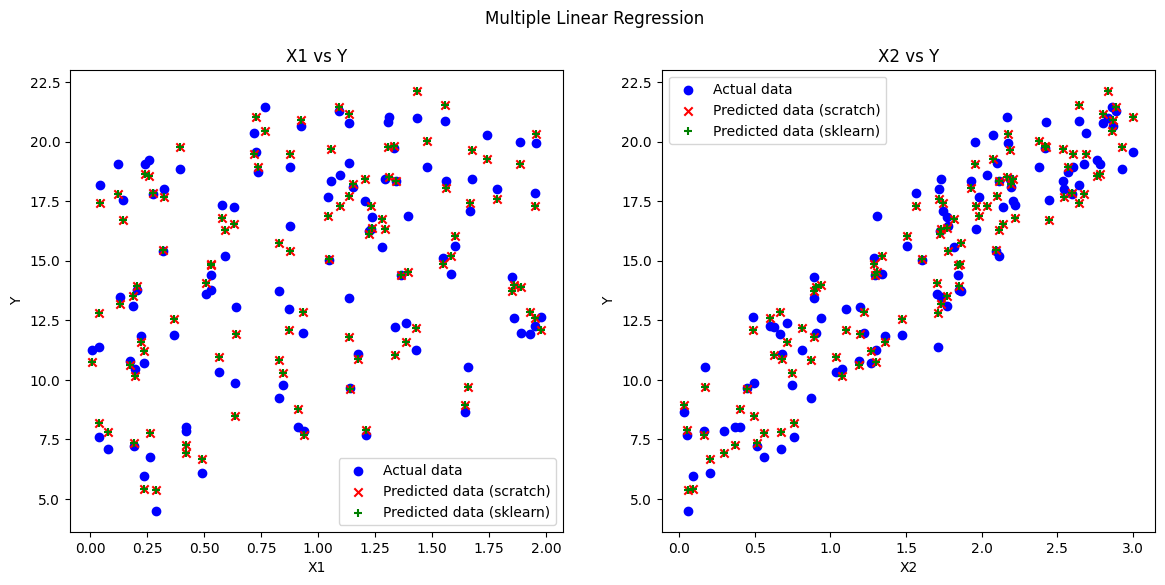

In [7]:
# Plotting the results
plt.figure(figsize=(14, 6))

# Plotting X1 vs Y
plt.subplot(1, 2, 1)
plt.scatter(X1, Y, color='blue', label='Actual data')
plt.scatter(X1, Y_pred_scratch, color='red', label='Predicted data (scratch)', marker='x')
plt.scatter(X1, Y_pred_sklearn, color='green', label='Predicted data (sklearn)', marker='+')
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('X1 vs Y')
plt.legend()

# Plotting X2 vs Y
plt.subplot(1, 2, 2)
plt.scatter(X2, Y, color='blue', label='Actual data')
plt.scatter(X2, Y_pred_scratch, color='red', label='Predicted data (scratch)', marker='x')
plt.scatter(X2, Y_pred_sklearn, color='green', label='Predicted data (sklearn)', marker='+')
plt.xlabel('X2')
plt.ylabel('Y')
plt.title('X2 vs Y')
plt.legend()

plt.suptitle('Multiple Linear Regression')
plt.show()


## Conclusion

In this example, we explored Multiple Linear Regression using both a custom implementation and the `sklearn` library. Here are the key takeaways:

- **Model Understanding**: Multiple Linear Regression models the relationship between multiple independent variables $( X_1, X_2, \ldots, X_p )$ and a single dependent variable \( Y \) using a linear equation.
- **Implementation**: We implemented Multiple Linear Regression from scratch using Ordinary Least Squares (OLS) and also used the `LinearRegression` class from `sklearn`.
- **Results**: Both implementations provided similar results, demonstrating how to fit the model to data, make predictions, and evaluate the model's performance.
- **Benefits**: MLR can handle multiple predictors, providing a more comprehensive model, improved accuracy, and the ability to control for confounding variables.

Multiple Linear Regression is a powerful tool in statistical analysis and predictive modeling, extending the capabilities of linear regression to handle multiple predictors simultaneously.
